In [2]:
# for testing my function
from ResSimUtils_ans import cal_krw_ans, cal_kro_ans, cal_Ta_ans
from ResSimUtils import cal_krw, cal_kro, cal_Ta
import numpy as np
from scipy.sparse import spdiags
from matplotlib import pyplot as plt

In [3]:
# Simulation control Parameters ===========================================
dt_init  = 0.50  # initial time step[day]. time step might be revised to meet CFL condition
t_max    = 10*365.25 # [day] simulation will continues until t becomes t_max
n_out    = 40 # [day] Production history would be output every n_out time step
n_max    = 1e8# maximum interation [-]
t_hist   = [0] # vector to hold time of day when simulation result is output
plotsave = 0 # boot variables to control save plot(1 == save)
plotshow = 1 # show Saturation distribution every t_out [day]

# Reservoir Properties ===================================================
Lx = 1000 # Reservoir Length in x direction [ft]
Ly = 10 # Reservoir Length in y direction [ft]
h  = 10   # Reservoir tickness in z direction [ft]
nx = 200   # number of grid in x direction [-]
ny = 20   # number of grid in y direction [-]
dx = Lx / nx # grid size in x direction
# dy = Ly / ny # grid size in y direction
dy = 100 # width of the reservoir
perm_x  = 100*np.ones(nx) # Absolute permeability in x direction [mD]
# perm_y  = 100*np.ones(ny, nx) # Absolute permeability in y direction [mD]
phi_res = 0.3*np.ones(nx) # Porosity of reservoir [-]
P_init  = 1000*np.ones(nx) # Initial pressure in reservoir [PSI]

# define coordinate system
x    = np.zeros(nx)
x[0] = 0.5*dx
#y = np.np.zeros(ny)
#y[0] = 0.5*dy

# x coordinate
for i in range(1,len(x)):
    x[i] = x[i-1] + dx

# Fluid Properties =======================================================
# Injected water properties
vis_w        = 1.0 # viscosity of water [cp]
Bw           = 1.0 # formation volume factor of water
cw           = 1e-5 # compressibility of water [psi^-1]
Sw_i         = 0 # irreducible water saturation
Sw_init      = 0.2*np.ones(nx) # initial water saturation distribution
Sw_init      = np.linspace(0, 1, nx)

perm_rw_max  = 1 # maximuam relative perm. of water [-]
nw           = 3.0 # exponent of water relative permeability curve [>1]

# Oil water Properties
vis_o        = 1.0 # viscosity of oil [cp]
Bo           = 1.0 # formation volume factor of oil
co           = 1e-5 # compressibility of oil [psi^-1]
So_r         = 0 # residual oil saturation
So_init      = 1 - Sw_init # initial oil saturation progile
perm_ro_max  = 1 # maximuam relative perm. of oil [-]
no           = 3.0 # exponent of oil relative permeability curve [>1]

# Injection Well Properties ==============================================
# injection wells are controlled by flow rate[ft^3 /day]. Injecters are
# composed of water flow rate. Producers are only controlled by total flow
# rate.

# Injection wells (source term)
#Qin = np.zeros(ny, nx) # Injection wells
Qin = np.zeros(nx) # Injection wells
loc_Qin  = [0]
Qin[loc_Qin[0]]   = 1.5*426.5

# Production Well Properties =============================================
# production wells are controlled by flow rate[ft^s /day] or constant
# Bottom Hole Pressure, Pwf [PSI]. If Pwf is larger than Pi (mean pressure
# in CV), the situation is regarded as no production.

# Production wells (sink term) controlled by Flow Rate --------------------
#Qout = np.zeros(ny, nx) # Production wells
Qout = np.zeros(nx)
loc_Qout  = [nx-1]
Qout[loc_Qout[0]]   = -1.5*426.5


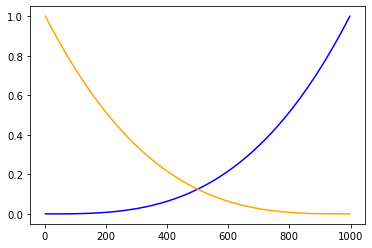

In [4]:
perm_rw = cal_krw_ans(Sw_init, Sw_i, So_r, perm_rw_max, nw)
perm_ro = cal_kro_ans(Sw_init, Sw_i, So_r, perm_ro_max, no)
#plt.plot(Sw_init, perm_rw, label='Water Relative Perm.', color='blue')
plt.plot(x, perm_rw, label='Water Relative Perm.', color='blue')
#plt.plot(Sw_init, perm_ro, label='Oil Relative Perm.', color='orange')
plt.plot(x, perm_ro, label='Oil Relative Perm.', color='orange')
#plt.xlim([0, 1])
plt.show()

In [5]:
T_water = cal_Ta_ans(perm_x,  perm_rw, h, dx, dy, vis_w, Bw, P_init, nx)
T_oil   = cal_Ta_ans(perm_x,  perm_ro, h, dx, dy, vis_o, Bo, P_init, nx)

In [6]:
T_water.toarray()

array([[ 1.26893907e-03, -1.26893907e-03,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.26893907e-03,  1.26893907e-02, -1.14204517e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -1.14204517e-02,  5.58333193e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         3.88075500e+04, -1.95515151e+04,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.95515151e+04,  3.94015176e+04, -1.98500025e+04],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00, -1.98500025e+04,  1.98500025e+04]])